#Load Data

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import zipfile
os.environ['KAGGLE_USERNAME'] = "chaiwatsuttiprapha"
os.environ['KAGGLE_KEY'] = "b1a3a0b8cbdcc3bb3bf1a95e0310d0e0"

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download prashant268/chest-xray-covid19-pneumonia

chest-xray-covid19-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!kaggle datasets download tawsifurrahman/covid19-radiography-database

covid19-radiography-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip chest-xray-covid19-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/COVID19/COVID19(228).jpg  
  inflating: Data/train/COVID19/COVID19(229).jpg  
  inflating: Data/train/COVID19/COVID19(23).jpg  
  inflating: Data/train/COVID19/COVID19(230).jpg  
  inflating: Data/train/COVID19/COVID19(231).jpg  
  inflating: Data/train/COVID19/COVID19(232).jpg  
  inflating: Data/train/COVID19/COVID19(233).jpg  
  inflating: Data/train/COVID19/COVID19(234).jpg  
  inflating: Data/train/COVID19/COVID19(235).jpg  
  inflating: Data/train/COVID19/COVID19(236).jpg  
  inflating: Data/train/COVID19/COVID19(237).jpg  
  inflating: Data/train/COVID19/COVID19(238).jpg  
  inflating: Data/train/COVID19/COVID19(239).jpg  
  inflating: Data/train/COVID19/COVID19(24).jpg  
  inflating: Data/train/COVID19/COVID19(240).jpg  
  inflating: Data/train/COVID19/COVID19(241).jpg  
  inflating: Data/train/COVID19/COVID19(242).jpg  
  inflating: Data/train/COVID19/COVID19(243).jpg  
  inflating: Data/train/COVID19/C

In [ ]:
!unzip covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

In [ ]:
import subprocess
def mergeFolder(path1,path2,merged_path):
  if not os.path.exists(merged_path):
    os.makedirs(merged_path)
  rsync_cmd = 'rsync' + ' -avzh ' + path1 + ' ' + path2 + ' ' + merged_path

  subprocess.run(rsync_cmd, shell=True)

In [ ]:
#mergeFolder('/content/Data/test/COVID19','/content/Data/train/COVID19','/content/Lung/Covid-19')
mergeFolder('/content/Data/test/NORMAL','/content/Data/train/NORMAL','/content/Lung/Normal')
mergeFolder('/content/Data/test/PNEUMONIA','/content/Data/train/PNEUMONIA','/content/Lung/PNEUMONIA')

In [ ]:
input_folder = "/content/COVID-19_Radiography_Dataset/Lung_Opacity"
import splitfolders

splitfolders.ratio(input_folder, output="Opacity-output",
    seed=1337, ratio=(.55, .45), group_prefix=None, move=False) # default values

Copying files: 12024 files [00:03, 3833.18 files/s]


In [ ]:
input_folder = "/content/Lung/PNEUMONIA"
import splitfolders

splitfolders.ratio(input_folder, output="PNEUMONIA-output",
    seed=1337, ratio=(.75, .25), group_prefix=None, move=False) # default values

Copying files: 4273 files [00:09, 472.19 files/s]


In [ ]:
len(os.listdir('/content/PNEUMONIA-output/train/PNEUMONIA'))

3204

# Image Processing

In [ ]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    
    img = cv2.resize(img, (128, 128))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [ ]:
def loadAndAugmentImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    
    img = cv2.resize(img, (128, 128))
    images.append(img)
    labels.append(target)

    img1 = cv2.flip(img, 1)
    images.append(img1)
    labels.append(target)

  images = np.asarray(images)
  return images, labels

In [ ]:
 covid_path = "/content/COVID-19_Radiography_Dataset/COVID/images"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

In [ ]:
covid_count = len(os.listdir('/content/COVID-19_Radiography_Dataset/COVID/images'))

In [ ]:
covidImages.shape

(3616, 128, 128, 3)

In [ ]:
normal_path = "/content/Lung/Normal/NORMAL"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadAndAugmentImages(normal_path, normal_urls, 0)

In [ ]:
normal_count = len(os.listdir('/content/Lung/Normal/NORMAL'))

In [ ]:
normalImages.shape

(3166, 128, 128, 3)

In [ ]:
Pneumonia_path = "/content/PNEUMONIA-output/train/PNEUMONIA"
Pneumonia_urls = os.listdir(Pneumonia_path)
PneumoniaImages, PneumoniaTargets = loadImages(Pneumonia_path, Pneumonia_urls, 2)

In [ ]:
pneumonia_count = len(os.listdir('/content/Lung/PNEUMONIA/PNEUMONIA'))

In [ ]:
PneumoniaImages.shape

(3204, 128, 128, 3)

In [ ]:
opacity_path = "/content/Opacity-output/train/images"
opacity_urls = os.listdir(opacity_path)
opacityImages, opacityTargets = loadImages(opacity_path, opacity_urls, 3)

In [ ]:
opacity_count = len(os.listdir('/content/Opacity-output/train/images'))

In [ ]:
opacityImages.shape

(3306, 128, 128, 3)

In [ ]:
data = np.r_[normalImages,covidImages,PneumoniaImages,opacityImages]

In [ ]:
data.shape

(13292, 128, 128, 3)

In [ ]:
targets = np.r_[normalTargets, covidTargets,PneumoniaTargets,opacityTargets]

In [ ]:
targets

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
targets.shape

(13292,)

# Sample Image

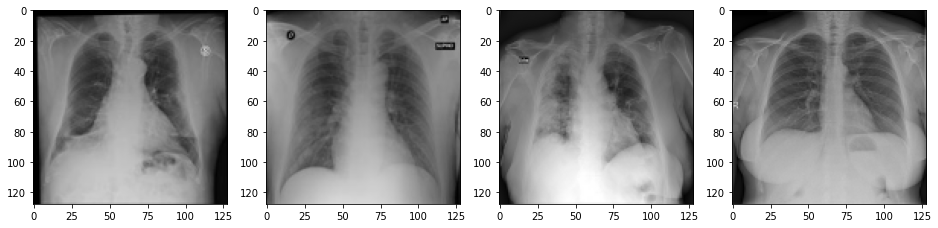

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes = axes.flatten()
for ax in axes:
    random_index = np.random.randint(0, data.shape[0])
    image = data[random_index]
    ax.imshow(image)

plt.show()

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.30, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=50)

In [ ]:
num_classes = len(np.unique(targets))
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]
y_val = np.eye(num_classes)[y_val]

x_train = np.reshape(x_train, (-1, 128, 128, 3))
x_test = np.reshape(x_test, (-1, 128, 128, 3))
x_val = np.reshape(x_val, (-1, 128, 128, 3))

In [ ]:
num_classes

4

In [ ]:
del covidImages,covidTargets,covidUrl,covid_path,normalImages,normalTargets,normal_path,normal_urls,PneumoniaImages,PneumoniaTargets,Pneumonia_path,Pneumonia_urls,opacityImages,opacityTargets,opacity_path,opacity_urls

#CNN Edit Layer

In [ ]:
import tensorflow as tf

In [ ]:
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D,GlobalAveragePooling2D,Reshape
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D,Input
from keras.models import Model,Sequential
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.losses import categorical_crossentropy
import math

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image

In [ ]:
model_checkpoint = ModelCheckpoint('/content/CNN_4class.h5',
                                                      save_best_only=True,
                                                      monitor='val_loss',
                                                      verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = 'same',input_shape=(128, 128, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.1))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.0001), loss=categorical_crossentropy,metrics=['accuracy'])

In [ ]:
his_cnn = model.fit(x_train, y_train,batch_size=64,epochs=50,validation_data=(x_val, y_val),callbacks=[model_checkpoint])

In [ ]:
model = tf.keras.models.load_model("/content/CNN_4class.h5")

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: {:.4f}'.format(test_acc))
print('Loss accuracy: {:.4f}'.format(test_loss))

63/63 [==============================] - 1s 16ms/step - loss: 0.1350 - accuracy: 0.9639
Test accuracy: 0.9639
Loss accuracy: 0.1350


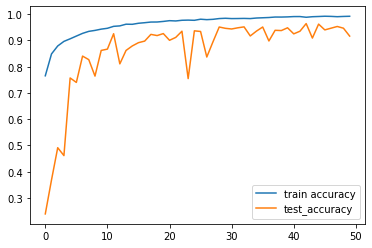

In [ ]:
plt.plot(his_cnn.history['accuracy'], label = 'train accuracy')
plt.plot(his_cnn.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

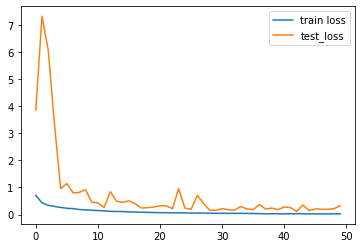

In [ ]:
plt.plot(his_cnn.history['loss'], label = 'train loss')
plt.plot(his_cnn.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

63/63 [==============================] - 1s 13ms/step


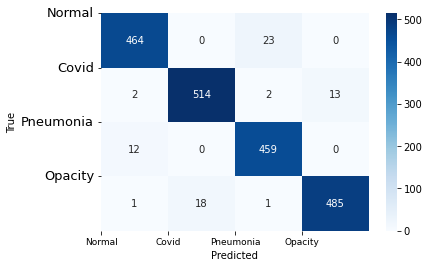

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sn
import pandas as pd

test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions,axis=-1)
cm = confusion_matrix(test_labels,predictions)
ax = sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# set the y-axis tick labels to be vertical
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(range(4), ['Normal','Covid','Pneumonia','Opacity'],fontsize=9)
plt.yticks(range(4), ['Normal','Covid','Pneumonia','Opacity'],fontsize=13)
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


# Compute precision, recall, and F1 score for each class
report = classification_report(test_labels, predictions, digits=4, output_dict=True)

# Compute accuracy for each class
n_samples = np.sum(cm)
accuracy = np.array([cm[i][i] / np.sum(cm[i, :]) for i in range(cm.shape[0])])


class_count = ['Normal','Covid-19','Pneumonia','Opacity']

for i in range(cm.shape[0]):
    print(f"\n{class_count[i]}")
    print(f"Precision: {report[str(i)]['precision']:.4f}")
    print(f"Recall: {report[str(i)]['recall']:.4f}")
    print(f"F1 Score: {report[str(i)]['f1-score']:.4f}")
    print(f"Accuracy: {accuracy[i]:.4f}")


Normal
Precision: 0.9687
Recall: 0.9528
F1 Score: 0.9607
Accuracy: 0.9528

Covid-19
Precision: 0.9662
Recall: 0.9680
F1 Score: 0.9671
Accuracy: 0.9680

Pneumonia
Precision: 0.9464
Recall: 0.9745
F1 Score: 0.9603
Accuracy: 0.9745

Opacity
Precision: 0.9739
Recall: 0.9604
F1 Score: 0.9671
Accuracy: 0.9604


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

# y_true and y_pred are lists of true and predicted labels
y_true = test_labels
y_pred = predictions
f1 = f1_score(y_true, y_pred, average=None)
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)

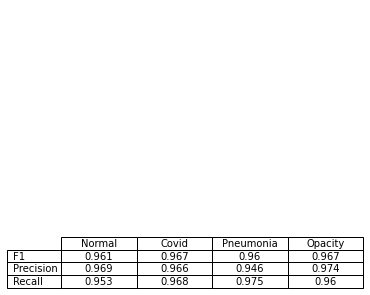

In [ ]:
import matplotlib.pyplot as plt

# Get the list of labels
labels = ['Normal','Covid','Pneumonia','Opacity']

# Round the scores to 3 decimal places
f1_rounded = [round(x, 3) for x in f1]
precision_rounded = [round(x, 3) for x in precision]
recall_rounded = [round(x, 3) for x in recall]

# Create a new figure and a table with the scores
plt.figure()
plt.table(cellText=[f1_rounded, precision_rounded, recall_rounded],
          rowLabels=['F1', 'Precision', 'Recall'],
          colLabels=labels,
          cellLoc='center')
plt.axis('off')

# Adjust the spacing around the table
plt.subplots_adjust(left=0.2, top=0.95, bottom=0.15)

# Show the table
plt.show()


In [ ]:
from google.colab import files
import pandas as pd
files.download('/content/CNN_4class.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### CNN SGD Optimizer

In [ ]:
model.compile(optimizer=SGD(learning_rate = 0.01,momentum = 0.7), loss=categorical_crossentropy,metrics=['accuracy'])

In [ ]:
model_checkpoint = ModelCheckpoint('/content/CNN_SGD_4class.h5',
                                                      save_best_only=True,
                                                      monitor='val_loss',
                                                      verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
his_cnn = model.fit(x_train, y_train,batch_size=64,epochs=50,validation_data=(x_val, y_val),callbacks=[model_checkpoint])

Epoch 1/50
146/146 [==============================] - ETA: 0s - loss: 0.6583 - accuracy: 0.7704
Epoch 1: val_loss improved from inf to 0.98681, saving model to /content/CNN_SGD_4class.h5
146/146 [==============================] - 37s 160ms/step - loss: 0.6583 - accuracy: 0.7704 - val_loss: 0.9868 - val_accuracy: 0.6043
Epoch 2/50
146/146 [==============================] - ETA: 0s - loss: 0.4122 - accuracy: 0.8491
Epoch 2: val_loss improved from 0.98681 to 0.97619, saving model to /content/CNN_SGD_4class.h5
146/146 [==============================] - 21s 147ms/step - loss: 0.4122 - accuracy: 0.8491 - val_loss: 0.9762 - val_accuracy: 0.6846
Epoch 3/50
146/146 [==============================] - ETA: 0s - loss: 0.3287 - accuracy: 0.8778
Epoch 3: val_loss improved from 0.97619 to 0.52414, saving model to /content/CNN_SGD_4class.h5
146/146 [==============================] - 22s 152ms/step - loss: 0.3287 - accuracy: 0.8778 - val_loss: 0.5241 - val_accuracy: 0.8240
Epoch 4/50
146/146 [=========

In [ ]:
model = tf.keras.models.load_model("/content/CNN_SGD_4class.h5")

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: {:.4f}'.format(test_acc))
print('Loss accuracy: {:.4f}'.format(test_loss))

63/63 [==============================] - 2s 15ms/step - loss: 0.1562 - accuracy: 0.9599
Test accuracy: 0.9599
Loss accuracy: 0.1562


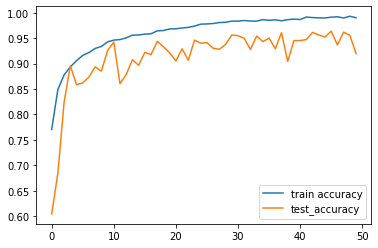

In [ ]:
import matplotlib.pyplot as plt

plt.plot(his_cnn.history['accuracy'], label = 'train accuracy')
plt.plot(his_cnn.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

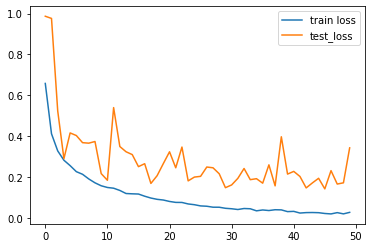

In [ ]:
import matplotlib.pyplot as plt

plt.plot(his_cnn.history['loss'], label = 'train loss')
plt.plot(his_cnn.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

63/63 [==============================] - 1s 14ms/step


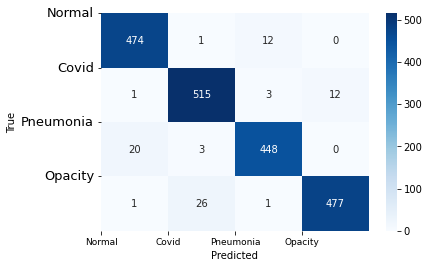

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sn
import pandas as pd

test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions,axis=-1)
cm = confusion_matrix(test_labels,predictions)
ax = sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# set the y-axis tick labels to be vertical
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(range(4), ['Normal','Covid','Pneumonia','Opacity'],fontsize=9)
plt.yticks(range(4), ['Normal','Covid','Pneumonia','Opacity'],fontsize=13)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

report = classification_report(test_labels, predictions, digits=4, output_dict=True)

n_samples = np.sum(cm)
accuracy = np.array([cm[i][i] / np.sum(cm[i, :]) for i in range(cm.shape[0])])


class_count = ['Normal','Covid-19','Pneumonia','Opacity']

for i in range(cm.shape[0]):
    print(f"\n{class_count[i]}")
    print(f"Precision: {report[str(i)]['precision']:.4f}")
    print(f"Recall: {report[str(i)]['recall']:.4f}")
    print(f"F1 Score: {report[str(i)]['f1-score']:.4f}")
    print(f"Accuracy: {accuracy[i]:.4f}")


Normal
Precision: 0.9556
Recall: 0.9733
F1 Score: 0.9644
Accuracy: 0.9733

Covid-19
Precision: 0.9450
Recall: 0.9699
F1 Score: 0.9572
Accuracy: 0.9699

Pneumonia
Precision: 0.9655
Recall: 0.9512
F1 Score: 0.9583
Accuracy: 0.9512

Opacity
Precision: 0.9755
Recall: 0.9446
F1 Score: 0.9598
Accuracy: 0.9446


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

# y_true and y_pred are lists of true and predicted labels
y_true = test_labels
y_pred = predictions
f1 = f1_score(y_true, y_pred, average=None)
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)

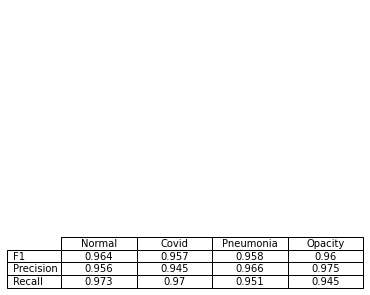

In [ ]:
import matplotlib.pyplot as plt

# Get the list of labels
labels = ['Normal','Covid','Pneumonia','Opacity']

# Round the scores to 3 decimal places
f1_rounded = [round(x, 3) for x in f1]
precision_rounded = [round(x, 3) for x in precision]
recall_rounded = [round(x, 3) for x in recall]

# Create a new figure and a table with the scores
plt.figure()
plt.table(cellText=[f1_rounded, precision_rounded, recall_rounded],
          rowLabels=['F1', 'Precision', 'Recall'],
          colLabels=labels,
          cellLoc='center')
plt.axis('off')

# Adjust the spacing around the table
plt.subplots_adjust(left=0.2, top=0.95, bottom=0.15)

# Show the table
plt.show()


In [ ]:
from google.colab import files
import pandas as pd
files.download('/content/CNN_SGD_4class.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# VGG16 Model

In [ ]:
vgg16_base_model = VGG16(input_shape=(128,128,3),include_top= False)

for layer in vgg16_base_model.layers:
    layer.trainable = False

X = Flatten()(vgg16_base_model.output)
X = Dense(64,activation = 'relu')(X)
X = Dropout(0.25)(X)
X = Dense(128,activation = 'relu')(X)
X = Dense(256,activation = 'relu')(X)
X = Dropout(0.5)(X)
X = Dense(4,activation = 'softmax')(X)

vgg16_model = Model(vgg16_base_model.input,X)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
vgg16_model.compile(optimizer = Adam(learning_rate = 0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
model_checkpoint = ModelCheckpoint('/content/vgg16_4class.h5',
                                                      save_best_only=True,
                                                      monitor='val_loss',
                                                      verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=15)

In [ ]:
his_vgg16 = vgg16_model.fit(x_train, y_train,batch_size=64,epochs=50,validation_data=(x_val, y_val),callbacks = [model_checkpoint])

Epoch 1/50
146/146 [==============================] - ETA: 0s - loss: 0.8951 - accuracy: 0.6060
Epoch 1: val_loss improved from inf to 0.43992, saving model to /content/vgg16_4class.h5
146/146 [==============================] - 29s 114ms/step - loss: 0.8951 - accuracy: 0.6060 - val_loss: 0.4399 - val_accuracy: 0.8330
Epoch 2/50
145/146 [============================>.] - ETA: 0s - loss: 0.4262 - accuracy: 0.8364
Epoch 2: val_loss improved from 0.43992 to 0.23305, saving model to /content/vgg16_4class.h5
146/146 [==============================] - 14s 95ms/step - loss: 0.4260 - accuracy: 0.8366 - val_loss: 0.2330 - val_accuracy: 0.9243
Epoch 3/50
145/146 [============================>.] - ETA: 0s - loss: 0.2809 - accuracy: 0.9051
Epoch 3: val_loss improved from 0.23305 to 0.18147, saving model to /content/vgg16_4class.h5
146/146 [==============================] - 14s 99ms/step - loss: 0.2807 - accuracy: 0.9051 - val_loss: 0.1815 - val_accuracy: 0.9358
Epoch 4/50
145/146 [=================

In [ ]:
vgg16_model = tf.keras.models.load_model("/content/vgg16_4class.h5")

In [ ]:
test_loss, test_acc = vgg16_model.evaluate(x_test, y_test)
print('Test accuracy: {:.4f}'.format(test_acc))
print('Loss accuracy: {:.4f}'.format(test_loss))

63/63 [==============================] - 4s 40ms/step - loss: 0.1537 - accuracy: 0.9539
Test accuracy: 0.9539
Loss accuracy: 0.1537


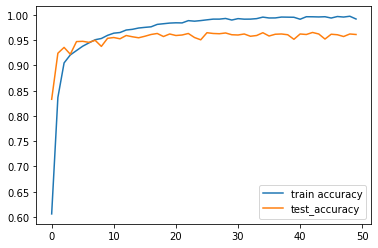

In [ ]:
plt.plot(his_vgg16.history['accuracy'], label = 'train accuracy')
plt.plot(his_vgg16.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

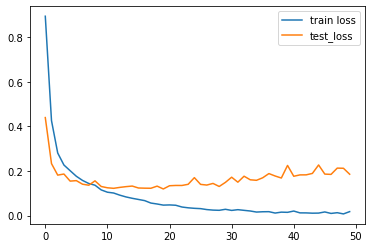

In [ ]:
plt.plot(his_vgg16.history['loss'], label = 'train loss')
plt.plot(his_vgg16.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

63/63 [==============================] - 3s 41ms/step


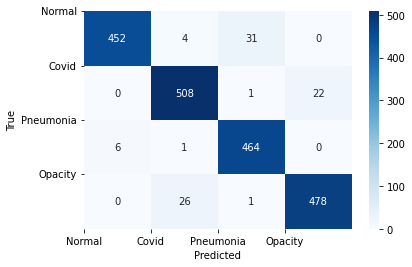

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sn
import pandas as pd

test_labels = np.argmax(y_test, axis=1)
predictions = vgg16_model.predict(x_test)
predictions = np.argmax(predictions,axis=-1)
cm = confusion_matrix(test_labels,predictions)
ax = sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# set the y-axis tick labels to be vertical
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(range(4), ['Normal','Covid','Pneumonia','Opacity'])
plt.yticks(range(4), ['Normal','Covid','Pneumonia','Opacity'])
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


# Compute precision, recall, and F1 score for each class
report = classification_report(test_labels, predictions, digits=4, output_dict=True)

# Compute accuracy for each class
n_samples = np.sum(cm)
accuracy = np.array([cm[i][i] / np.sum(cm[i, :]) for i in range(cm.shape[0])])


class_count = ['Normal','Covid-19','Pneumonia','Opacity']

for i in range(cm.shape[0]):
    print(f"\n{class_count[i]}")
    print(f"Precision: {report[str(i)]['precision']:.4f}")
    print(f"Recall: {report[str(i)]['recall']:.4f}")
    print(f"F1 Score: {report[str(i)]['f1-score']:.4f}")
    print(f"Accuracy: {accuracy[i]:.4f}")


Normal
Precision: 0.9869
Recall: 0.9281
F1 Score: 0.9566
Accuracy: 0.9281

Covid-19
Precision: 0.9425
Recall: 0.9567
F1 Score: 0.9495
Accuracy: 0.9567

Pneumonia
Precision: 0.9336
Recall: 0.9851
F1 Score: 0.9587
Accuracy: 0.9851

Opacity
Precision: 0.9560
Recall: 0.9465
F1 Score: 0.9512
Accuracy: 0.9465


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

# y_true and y_pred are lists of true and predicted labels
y_true = test_labels
y_pred = predictions
f1 = f1_score(y_true, y_pred, average=None)
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)

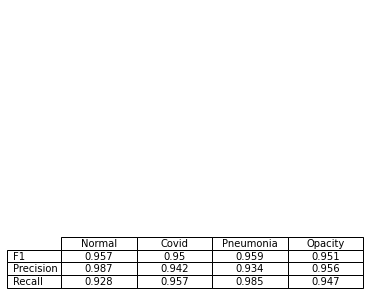

In [ ]:
import matplotlib.pyplot as plt

labels = ['Normal','Covid','Pneumonia','Opacity']

f1_rounded = [round(x, 3) for x in f1]
precision_rounded = [round(x, 3) for x in precision]
recall_rounded = [round(x, 3) for x in recall]

plt.figure()
plt.table(cellText=[f1_rounded, precision_rounded, recall_rounded],
          rowLabels=['F1', 'Precision', 'Recall'],
          colLabels=labels,
          cellLoc='center')
plt.axis('off')
plt.subplots_adjust(left=0.2, top=0.95, bottom=0.15)

plt.show()


In [ ]:
del his_vgg16,vgg16_base_model,vgg16_model

In [ ]:
from google.colab import files
import pandas as pd
files.download('/content/vgg16_4class.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### VGG16 SGD

In [ ]:
vgg16_model.compile(optimizer=SGD(learning_rate = 0.001,momentum = 0.9), loss=categorical_crossentropy,metrics=['accuracy'])

In [ ]:
model_checkpoint = ModelCheckpoint('/content/vgg16_SGD_4class.h5',
                                                      save_best_only=True,
                                                      monitor='val_loss',
                                                      verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
his_vgg16 = vgg16_model.fit(x_train, y_train,batch_size=64,epochs=50,validation_data=(x_val, y_val),callbacks=[model_checkpoint])

Epoch 1/50
146/146 [==============================] - ETA: 0s - loss: 1.1915 - accuracy: 0.4473
Epoch 1: val_loss improved from inf to 0.73315, saving model to /content/vgg16_SGD_4class.h5
146/146 [==============================] - 24s 136ms/step - loss: 1.1915 - accuracy: 0.4473 - val_loss: 0.7331 - val_accuracy: 0.7422
Epoch 2/50
145/146 [============================>.] - ETA: 0s - loss: 0.6897 - accuracy: 0.6984
Epoch 2: val_loss improved from 0.73315 to 0.46913, saving model to /content/vgg16_SGD_4class.h5
146/146 [==============================] - 16s 108ms/step - loss: 0.6891 - accuracy: 0.6987 - val_loss: 0.4691 - val_accuracy: 0.7984
Epoch 3/50
145/146 [============================>.] - ETA: 0s - loss: 0.4951 - accuracy: 0.7972
Epoch 3: val_loss improved from 0.46913 to 0.33798, saving model to /content/vgg16_SGD_4class.h5
146/146 [==============================] - 15s 104ms/step - loss: 0.4943 - accuracy: 0.7975 - val_loss: 0.3380 - val_accuracy: 0.8656
Epoch 4/50
145/146 [===

In [ ]:
vgg16_model = tf.keras.models.load_model("/content/vgg16_SGD_4class.h5")

In [ ]:
test_loss, test_acc = vgg16_model.evaluate(x_test, y_test)
print('Test accuracy: {:.4f}'.format(test_acc))
print('Loss accuracy: {:.4f}'.format(test_loss))

63/63 [==============================] - 5s 46ms/step - loss: 0.1338 - accuracy: 0.9514
Test accuracy: 0.9514
Loss accuracy: 0.1338


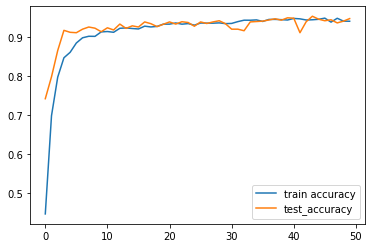

In [ ]:
plt.plot(his_vgg16.history['accuracy'], label = 'train accuracy')
plt.plot(his_vgg16.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

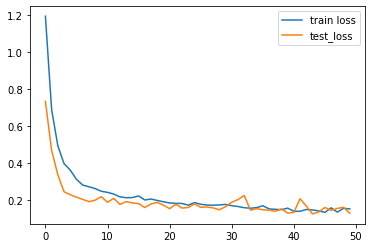

In [ ]:
plt.plot(his_vgg16.history['loss'], label = 'train loss')
plt.plot(his_vgg16.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

63/63 [==============================] - 3s 44ms/step


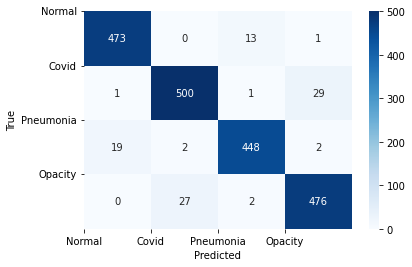

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sn
import pandas as pd

test_labels = np.argmax(y_test, axis=1)
predictions = vgg16_model.predict(x_test)
predictions = np.argmax(predictions,axis=-1)
cm = confusion_matrix(test_labels,predictions)
ax = sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# set the y-axis tick labels to be vertical
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(range(4), ['Normal','Covid','Pneumonia','Opacity'])
plt.yticks(range(4), ['Normal','Covid','Pneumonia','Opacity'])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Compute precision, recall, and F1 score for each class
report = classification_report(test_labels, predictions, digits=4, output_dict=True)

# Compute accuracy for each class
n_samples = np.sum(cm)
accuracy = np.array([cm[i][i] / np.sum(cm[i, :]) for i in range(cm.shape[0])])


class_count = ['Normal','Covid-19','Pneumonia','Opacity']

for i in range(cm.shape[0]):
    print(f"\n{class_count[i]}")
    print(f"Precision: {report[str(i)]['precision']:.4f}")
    print(f"Recall: {report[str(i)]['recall']:.4f}")
    print(f"F1 Score: {report[str(i)]['f1-score']:.4f}")
    print(f"Accuracy: {accuracy[i]:.4f}")


Normal
Precision: 0.9594
Recall: 0.9713
F1 Score: 0.9653
Accuracy: 0.9713

Covid-19
Precision: 0.9452
Recall: 0.9416
F1 Score: 0.9434
Accuracy: 0.9416

Pneumonia
Precision: 0.9655
Recall: 0.9512
F1 Score: 0.9583
Accuracy: 0.9512

Opacity
Precision: 0.9370
Recall: 0.9426
F1 Score: 0.9398
Accuracy: 0.9426


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

# y_true and y_pred are lists of true and predicted labels
y_true = test_labels
y_pred = predictions
f1 = f1_score(y_true, y_pred, average=None)
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)

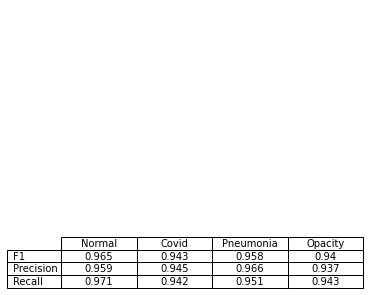

In [ ]:
import matplotlib.pyplot as plt

labels = ['Normal','Covid','Pneumonia','Opacity']

f1_rounded = [round(x, 3) for x in f1]
precision_rounded = [round(x, 3) for x in precision]
recall_rounded = [round(x, 3) for x in recall]

plt.figure()
plt.table(cellText=[f1_rounded, precision_rounded, recall_rounded],
          rowLabels=['F1', 'Precision', 'Recall'],
          colLabels=labels,
          cellLoc='center')
plt.axis('off')
plt.subplots_adjust(left=0.2, top=0.95, bottom=0.15)

plt.show()


In [ ]:
from google.colab import files
import pandas as pd
files.download('/content/vgg16_SGD_4class.h5')

# InceptionV3 Model

In [ ]:
del vgg16_model,vgg16_base_model,his_vgg16

In [ ]:
incpv3_base_model = InceptionV3(input_shape=(128,128,3),include_top= False)
for layer in incpv3_base_model.layers:
    layer.trainable = False

X = Flatten()(incpv3_base_model.output)
X = Dense(64,activation = 'relu')(X)
X = Dropout(0.25)(X)
X = Dense(128,activation = 'relu')(X)
X = Dense(256,activation = 'relu')(X)
X = Dropout(0.5)(X)
X = Dense(4,activation = 'softmax')(X)

incpv3_model = Model(incpv3_base_model.input,X)
incpv3_model.compile(optimizer = Adam(learning_rate = 0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_checkpoint = ModelCheckpoint('/content/inceptionV3_4class.h5',
                                                      save_best_only=True,
                                                      monitor='val_loss',
                                                      verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
incpv3_model.summary()

In [ ]:
his_incpv3 = incpv3_model.fit(x_train, y_train,batch_size=64,epochs=50,validation_data=(x_val, y_val),callbacks = [model_checkpoint])

In [ ]:
incpv3_model = tf.keras.models.load_model("/content/inceptionV3_4class.h5")

In [ ]:
test_loss, test_acc = incpv3_model.evaluate(x_test, y_test)
print('Test accuracy: {:.4f}'.format(test_acc))
print('Loss accuracy: {:.4f}'.format(test_loss))

63/63 [==============================] - 4s 27ms/step - loss: 0.3300 - accuracy: 0.8806
Test accuracy: 0.8806
Loss accuracy: 0.3300


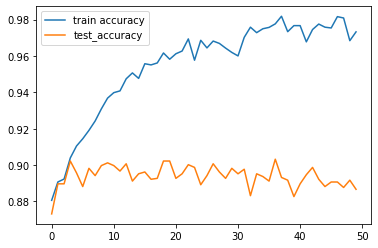

In [ ]:
plt.plot(his_incpv3.history['accuracy'], label = 'train accuracy')
plt.plot(his_incpv3.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

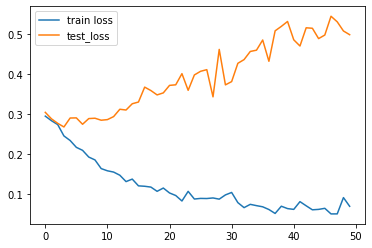

In [ ]:
plt.plot(his_incpv3.history['loss'], label = 'train loss')
plt.plot(his_incpv3.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

63/63 [==============================] - 3s 26ms/step


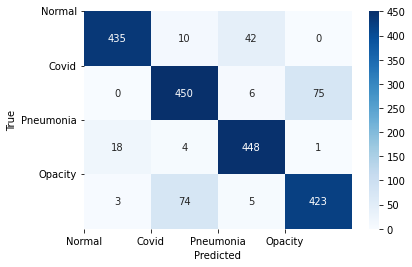

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sn
import pandas as pd

test_labels = np.argmax(y_test, axis=1)
predictions = incpv3_model.predict(x_test)
predictions = np.argmax(predictions,axis=-1)
cm = confusion_matrix(test_labels,predictions)
ax = sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# set the y-axis tick labels to be vertical
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(range(4), ['Normal','Covid','Pneumonia','Opacity'])
plt.yticks(range(4), ['Normal','Covid','Pneumonia','Opacity'])
plt.show()

In [ ]:
# Compute precision, recall, and F1 score for each class
report = classification_report(test_labels, predictions, digits=4, output_dict=True)

# Compute accuracy for each class
n_samples = np.sum(cm)
accuracy = np.array([cm[i][i] / np.sum(cm[i, :]) for i in range(cm.shape[0])])


class_count = ['Normal','Covid-19','Pneumonia','Opacity']

for i in range(cm.shape[0]):
    print(f"\n{class_count[i]}")
    print(f"Precision: {report[str(i)]['precision']:.4f}")
    print(f"Recall: {report[str(i)]['recall']:.4f}")
    print(f"F1 Score: {report[str(i)]['f1-score']:.4f}")
    print(f"Accuracy: {accuracy[i]:.4f}")


Normal
Precision: 0.9539
Recall: 0.8932
F1 Score: 0.9226
Accuracy: 0.8932

Covid-19
Precision: 0.8364
Recall: 0.8475
F1 Score: 0.8419
Accuracy: 0.8475

Pneumonia
Precision: 0.8942
Recall: 0.9512
F1 Score: 0.9218
Accuracy: 0.9512

Opacity
Precision: 0.8477
Recall: 0.8376
F1 Score: 0.8426
Accuracy: 0.8376


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

# y_true and y_pred are lists of true and predicted labels
y_true = test_labels
y_pred = predictions
f1 = f1_score(y_true, y_pred, average=None)
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)

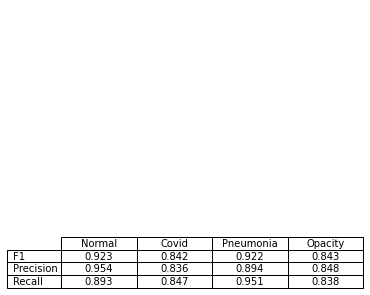

In [ ]:
import matplotlib.pyplot as plt

# Get the list of labels
labels = ['Normal','Covid','Pneumonia','Opacity']

# Round the scores to 3 decimal places
f1_rounded = [round(x, 3) for x in f1]
precision_rounded = [round(x, 3) for x in precision]
recall_rounded = [round(x, 3) for x in recall]

# Create a new figure and a table with the scores
plt.figure()
plt.table(cellText=[f1_rounded, precision_rounded, recall_rounded],
          rowLabels=['F1', 'Precision', 'Recall'],
          colLabels=labels,
          cellLoc='center')
plt.axis('off')

# Adjust the spacing around the table
plt.subplots_adjust(left=0.2, top=0.95, bottom=0.15)

# Show the table
plt.show()

In [ ]:
from google.colab import files
import pandas as pd
files.download('/content/inceptionV3_4class.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### InceptionV3 SGD

In [ ]:
incpv3_model.compile(optimizer=SGD(learning_rate = 0.001,momentum = 0.9), loss=categorical_crossentropy,metrics=['accuracy'])

In [ ]:
model_checkpoint = ModelCheckpoint('/content/incpv3_SGD_4class.h5',
                                                      save_best_only=True,
                                                      monitor='val_loss',
                                                      verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
his_incpv3 = incpv3_model.fit(x_train, y_train,batch_size=64,epochs=50,validation_data=(x_val, y_val),callbacks=[model_checkpoint])

Epoch 1/50
146/146 [==============================] - ETA: 0s - loss: 0.8858 - accuracy: 0.6045
Epoch 1: val_loss improved from inf to 0.49716, saving model to /content/incpv3_SGD_4class.h5
146/146 [==============================] - 19s 85ms/step - loss: 0.8858 - accuracy: 0.6045 - val_loss: 0.4972 - val_accuracy: 0.7919
Epoch 2/50
146/146 [==============================] - ETA: 0s - loss: 0.5750 - accuracy: 0.7580
Epoch 2: val_loss improved from 0.49716 to 0.39706, saving model to /content/incpv3_SGD_4class.h5
146/146 [==============================] - 9s 59ms/step - loss: 0.5750 - accuracy: 0.7580 - val_loss: 0.3971 - val_accuracy: 0.8335
Epoch 3/50
145/146 [============================>.] - ETA: 0s - loss: 0.4859 - accuracy: 0.7988
Epoch 3: val_loss improved from 0.39706 to 0.36265, saving model to /content/incpv3_SGD_4class.h5
146/146 [==============================] - 8s 58ms/step - loss: 0.4860 - accuracy: 0.7987 - val_loss: 0.3627 - val_accuracy: 0.8455
Epoch 4/50
145/146 [=====

In [ ]:
incpv3_model = tf.keras.models.load_model("/content/incpv3_SGD_4class.h5")

In [ ]:
test_loss, test_acc = incpv3_model.evaluate(x_test, y_test)
print('Test accuracy: {:.2f}'.format(test_acc))
print('Loss accuracy: {:.2f}'.format(test_loss))

63/63 [==============================] - 4s 27ms/step - loss: 0.3196 - accuracy: 0.8726
Test accuracy: 0.87
Loss accuracy: 0.32


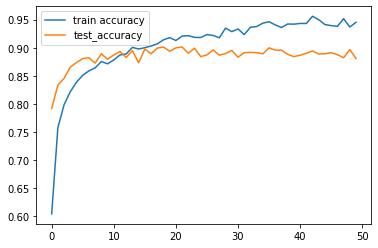

In [ ]:
plt.plot(his_incpv3.history['accuracy'], label = 'train accuracy')
plt.plot(his_incpv3.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

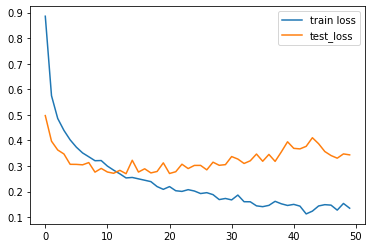

In [ ]:
plt.plot(his_incpv3.history['loss'], label = 'train loss')
plt.plot(his_incpv3.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

63/63 [==============================] - 3s 27ms/step


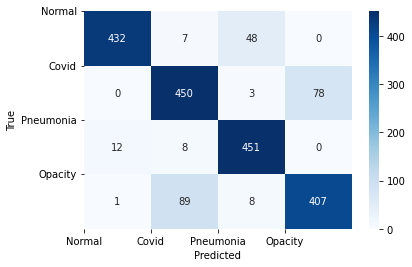

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sn
import pandas as pd

test_labels = np.argmax(y_test, axis=1)
predictions = incpv3_model.predict(x_test)
predictions = np.argmax(predictions,axis=-1)
cm = confusion_matrix(test_labels,predictions)
ax = sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# set the y-axis tick labels to be vertical
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(range(4), ['Normal','Covid','Pneumonia','Opacity'])
plt.yticks(range(4), ['Normal','Covid','Pneumonia','Opacity'])
plt.show()

In [ ]:
# Compute precision, recall, and F1 score for each class
report = classification_report(test_labels, predictions, digits=4, output_dict=True)

# Compute accuracy for each class
n_samples = np.sum(cm)
accuracy = np.array([cm[i][i] / np.sum(cm[i, :]) for i in range(cm.shape[0])])


class_count = ['Normal','Covid-19','Pneumonia','Opacity']

for i in range(cm.shape[0]):
    print(f"\n{class_count[i]}")
    print(f"Precision: {report[str(i)]['precision']:.4f}")
    print(f"Recall: {report[str(i)]['recall']:.4f}")
    print(f"F1 Score: {report[str(i)]['f1-score']:.4f}")
    print(f"Accuracy: {accuracy[i]:.4f}")


Normal
Precision: 0.9708
Recall: 0.8871
F1 Score: 0.9270
Accuracy: 0.8871

Covid-19
Precision: 0.8123
Recall: 0.8475
F1 Score: 0.8295
Accuracy: 0.8475

Pneumonia
Precision: 0.8843
Recall: 0.9575
F1 Score: 0.9195
Accuracy: 0.9575

Opacity
Precision: 0.8392
Recall: 0.8059
F1 Score: 0.8222
Accuracy: 0.8059


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

# y_true and y_pred are lists of true and predicted labels
y_true = test_labels
y_pred = predictions
f1 = f1_score(y_true, y_pred, average=None)
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)

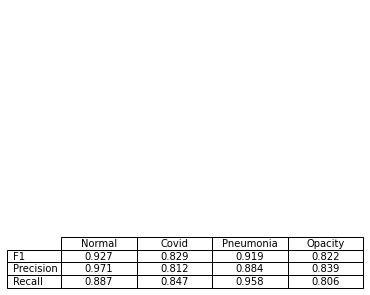

In [ ]:
import matplotlib.pyplot as plt

labels = ['Normal','Covid','Pneumonia','Opacity']

f1_rounded = [round(x, 3) for x in f1]
precision_rounded = [round(x, 3) for x in precision]
recall_rounded = [round(x, 3) for x in recall]

plt.figure()
plt.table(cellText=[f1_rounded, precision_rounded, recall_rounded],
          rowLabels=['F1', 'Precision', 'Recall'],
          colLabels=labels,
          cellLoc='center')
plt.axis('off')
plt.subplots_adjust(left=0.2, top=0.95, bottom=0.15)

plt.show()


In [ ]:
from google.colab import files
import pandas as pd
files.download('/content/incpv3_SGD_4class.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ResNet50V2

In [ ]:
from tensorflow.keras.applications import ResNet50V2

In [ ]:
resnet_base_model = ResNet50V2(include_top=False, input_shape=(128, 128, 3),weights = 'imagenet', classes=4)

In [ ]:
for layer in resnet_base_model.layers:
    layer.trainable = False

In [ ]:
X = GlobalAveragePooling2D()(resnet_base_model.output)
X = Dense(1024,activation = 'relu')(X)
X = BatchNormalization()(X)
X = Dropout(0.5)(X)
X = Dense(4,activation = 'softmax')(X)

resnet_model = Model(resnet_base_model.input,X)
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

resnet_model.summary()

In [ ]:
model_checkpoint = ModelCheckpoint('/content/restnet_4class.h5',
                                                      save_best_only=True,
                                                      monitor='val_loss',
                                                      verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
his_resnet = resnet_model.fit(x_train, y_train,batch_size=64,epochs=50,validation_data=(x_test, y_test),callbacks = [model_checkpoint])

In [ ]:
resnet_model = tf.keras.models.load_model("/content/restnet_4class.h5")

In [ ]:
test_loss, test_acc = resnet_model.evaluate(x_test, y_test)
print('Test accuracy: {:.4f}'.format(test_acc))
print('Loss accuracy: {:.4f}'.format(test_loss))

63/63 [==============================] - 4s 33ms/step - loss: 0.2442 - accuracy: 0.9127
Test accuracy: 0.9127
Loss accuracy: 0.2442


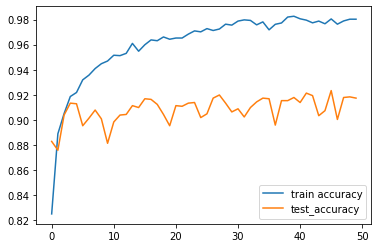

In [ ]:
plt.plot(his_resnet.history['accuracy'], label = 'train accuracy')
plt.plot(his_resnet.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

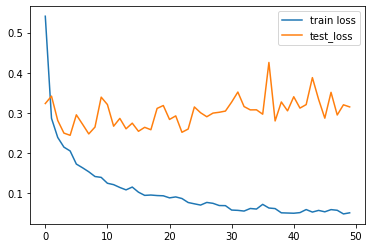

In [ ]:
plt.plot(his_resnet.history['loss'], label = 'train loss')
plt.plot(his_resnet.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

63/63 [==============================] - 3s 31ms/step


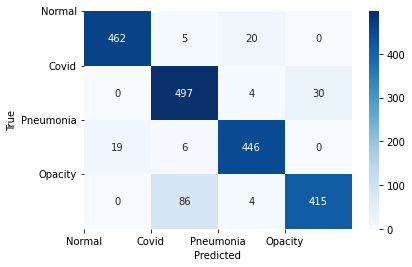

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sn
import pandas as pd

test_labels = np.argmax(y_test, axis=1)
predictions = resnet_model.predict(x_test)
predictions = np.argmax(predictions,axis=-1)
cm = confusion_matrix(test_labels,predictions)
ax = sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# set the y-axis tick labels to be vertical
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(range(4), ['Normal','Covid','Pneumonia','Opacity'])
plt.yticks(range(4), ['Normal','Covid','Pneumonia','Opacity'])
plt.show()

In [ ]:
# Compute precision, recall, and F1 score for each class
report = classification_report(test_labels, predictions, digits=4, output_dict=True)

# Compute accuracy for each class
n_samples = np.sum(cm)
accuracy = np.array([cm[i][i] / np.sum(cm[i, :]) for i in range(cm.shape[0])])


class_count = ['Normal','Covid-19','Pneumonia','Opacity']

for i in range(cm.shape[0]):
    print(f"\n{class_count[i]}")
    print(f"Precision: {report[str(i)]['precision']:.4f}")
    print(f"Recall: {report[str(i)]['recall']:.4f}")
    print(f"F1 Score: {report[str(i)]['f1-score']:.4f}")
    print(f"Accuracy: {accuracy[i]:.4f}")


Normal
Precision: 0.9605
Recall: 0.9487
F1 Score: 0.9545
Accuracy: 0.9487

Covid-19
Precision: 0.8367
Recall: 0.9360
F1 Score: 0.8836
Accuracy: 0.9360

Pneumonia
Precision: 0.9409
Recall: 0.9469
F1 Score: 0.9439
Accuracy: 0.9469

Opacity
Precision: 0.9326
Recall: 0.8218
F1 Score: 0.8737
Accuracy: 0.8218


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

# y_true and y_pred are lists of true and predicted labels
y_true = test_labels
y_pred = predictions
f1 = f1_score(y_true, y_pred, average=None)
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)

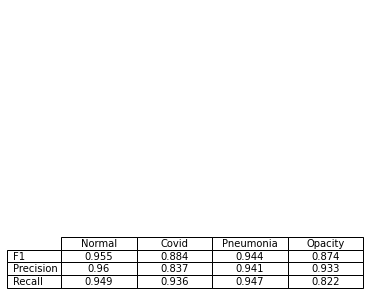

In [ ]:
import matplotlib.pyplot as plt

# Get the list of labels
labels = ['Normal','Covid','Pneumonia','Opacity']

# Round the scores to 3 decimal places
f1_rounded = [round(x, 3) for x in f1]
precision_rounded = [round(x, 3) for x in precision]
recall_rounded = [round(x, 3) for x in recall]

# Create a new figure and a table with the scores
plt.figure()
plt.table(cellText=[f1_rounded, precision_rounded, recall_rounded],
          rowLabels=['F1', 'Precision', 'Recall'],
          colLabels=labels,
          cellLoc='center')
plt.axis('off')

# Adjust the spacing around the table
plt.subplots_adjust(left=0.2, top=0.95, bottom=0.15)

# Show the table
plt.show()

In [ ]:
from google.colab import files
import pandas as pd
files.download('/content/restnet_4class.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### ResNet50V2 SGD Optimizer

In [ ]:
X = GlobalAveragePooling2D()(resnet_base_model.output)
X = Dense(1024,activation = 'relu')(X)
X = Dropout(0.5)(X)
X = Dense(4,activation = 'softmax')(X)

resnet_model = Model(resnet_base_model.input,X)
resnet_model.compile(optimizer=SGD(learning_rate = 0.001,momentum = 0.9), loss='categorical_crossentropy', metrics=['accuracy'])

resnet_model.summary()

In [ ]:
model_checkpoint = ModelCheckpoint('/content/restnet_SGD_4class.h5',
                                                      save_best_only=True,
                                                      monitor='val_loss',
                                                      verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
his_resnet = resnet_model.fit(x_train, y_train,batch_size=64,epochs=50,validation_data=(x_test, y_test),callbacks = [model_checkpoint])

Epoch 1/50
146/146 [==============================] - ETA: 0s - loss: 0.6675 - accuracy: 0.7480
Epoch 1: val_loss improved from inf to 0.37838, saving model to /content/restnet_SGD_4class.h5
146/146 [==============================] - 19s 96ms/step - loss: 0.6675 - accuracy: 0.7480 - val_loss: 0.3784 - val_accuracy: 0.8450
Epoch 2/50
145/146 [============================>.] - ETA: 0s - loss: 0.4027 - accuracy: 0.8352
Epoch 2: val_loss improved from 0.37838 to 0.35125, saving model to /content/restnet_SGD_4class.h5
146/146 [==============================] - 11s 76ms/step - loss: 0.4034 - accuracy: 0.8351 - val_loss: 0.3513 - val_accuracy: 0.8611
Epoch 3/50
145/146 [============================>.] - ETA: 0s - loss: 0.3557 - accuracy: 0.8523
Epoch 3: val_loss improved from 0.35125 to 0.35035, saving model to /content/restnet_SGD_4class.h5
146/146 [==============================] - 11s 76ms/step - loss: 0.3556 - accuracy: 0.8520 - val_loss: 0.3503 - val_accuracy: 0.8631
Epoch 4/50
145/146 [

In [ ]:
resnet_model = tf.keras.models.load_model("/content/restnet_SGD_4class.h5")

In [ ]:
test_loss, test_acc = resnet_model.evaluate(x_test, y_test)
print('Test accuracy: {:.4f}'.format(test_acc))
print('Loss accuracy: {:.4f}'.format(test_loss))

63/63 [==============================] - 2s 36ms/step - loss: 0.2286 - accuracy: 0.9147
Test accuracy: 0.9147
Loss accuracy: 0.2286


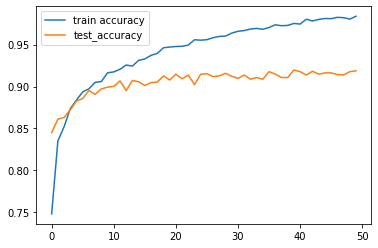

In [ ]:
plt.plot(his_resnet.history['accuracy'], label = 'train accuracy')
plt.plot(his_resnet.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

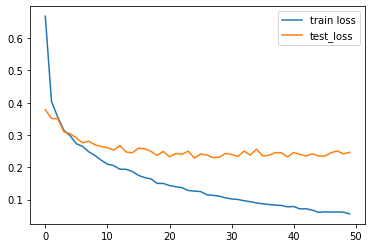

In [ ]:
plt.plot(his_resnet.history['loss'], label = 'train loss')
plt.plot(his_resnet.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

63/63 [==============================] - 3s 32ms/step


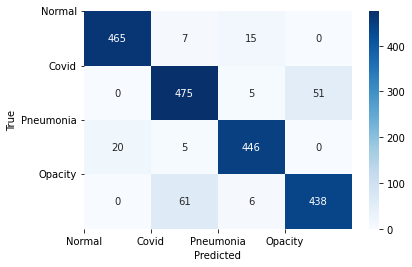

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sn
import pandas as pd

test_labels = np.argmax(y_test, axis=1)
predictions = resnet_model.predict(x_test)
predictions = np.argmax(predictions,axis=-1)
cm = confusion_matrix(test_labels,predictions)
ax = sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# set the y-axis tick labels to be vertical
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(range(4), ['Normal','Covid','Pneumonia','Opacity'])
plt.yticks(range(4), ['Normal','Covid','Pneumonia','Opacity'])
plt.show()

In [ ]:
# Compute precision, recall, and F1 score for each class
report = classification_report(test_labels, predictions, digits=4, output_dict=True)

# Compute accuracy for each class
n_samples = np.sum(cm)
accuracy = np.array([cm[i][i] / np.sum(cm[i, :]) for i in range(cm.shape[0])])


class_count = ['Normal','Covid-19','Pneumonia','Opacity']

for i in range(cm.shape[0]):
    print(f"\n{class_count[i]}")
    print(f"Precision: {report[str(i)]['precision']:.4f}")
    print(f"Recall: {report[str(i)]['recall']:.4f}")
    print(f"F1 Score: {report[str(i)]['f1-score']:.4f}")
    print(f"Accuracy: {accuracy[i]:.4f}")


Normal
Precision: 0.9588
Recall: 0.9548
F1 Score: 0.9568
Accuracy: 0.9548

Covid-19
Precision: 0.8668
Recall: 0.8945
F1 Score: 0.8804
Accuracy: 0.8945

Pneumonia
Precision: 0.9449
Recall: 0.9469
F1 Score: 0.9459
Accuracy: 0.9469

Opacity
Precision: 0.8957
Recall: 0.8673
F1 Score: 0.8813
Accuracy: 0.8673


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

# y_true and y_pred are lists of true and predicted labels
y_true = test_labels
y_pred = predictions
f1 = f1_score(y_true, y_pred, average=None)
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)

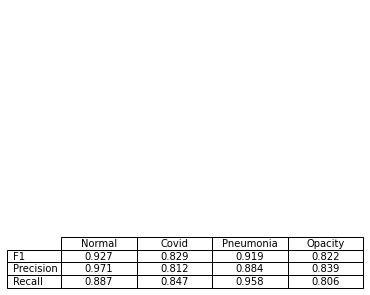

In [ ]:
import matplotlib.pyplot as plt

# Get the list of labels
labels = ['Normal','Covid','Pneumonia','Opacity']

# Round the scores to 3 decimal places
f1_rounded = [round(x, 3) for x in f1]
precision_rounded = [round(x, 3) for x in precision]
recall_rounded = [round(x, 3) for x in recall]

# Create a new figure and a table with the scores
plt.figure()
plt.table(cellText=[f1_rounded, precision_rounded, recall_rounded],
          rowLabels=['F1', 'Precision', 'Recall'],
          colLabels=labels,
          cellLoc='center')
plt.axis('off')

# Adjust the spacing around the table
plt.subplots_adjust(left=0.2, top=0.95, bottom=0.15)

# Show the table
plt.show()

In [ ]:
from google.colab import files
import pandas as pd
files.download('/content/restnet_SGD_4class.h5')

# Test with unseen data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/model/inceptionV3_4class.h5")

In [ ]:
vgg16_model = tf.keras.models.load_model("/content/vgg16_4class.h5")

In [ ]:
path = '/content/drive/MyDrive/testing/PNEUMONIA'
urls = os.listdir(path)
images = []

for i in range(1,29):
  img_path = path + "/" + urls[i]
  img = cv2.imread(img_path)
  img = img / 255.0
    
  img = cv2.resize(img, (128, 128))
  images.append(img)

In [ ]:
data_test = np.r_[images]

In [ ]:
predictions = model.predict(data_test)
predictions = np.argmax(predictions,axis=-1)
labels = ['Normal','Covid-19','Pneumonia','Opacity']
predictions_labels = [labels[i] for i in predictions]
predictions_labels

1/1 [==============================] - 0s 19ms/step


['Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia']